<a href="https://colab.research.google.com/github/Keerthi0912K/Key-factors-that-influence-US-Home-Prices-Nationally/blob/main/USHome_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load Data

In [ ]:
import pandas as pd

# Function to add month, quarter, and year columns
def add_time_fields(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['Month'] = df[date_column].dt.month
    df['Quarter'] = df[date_column].dt.quarter
    df['Year'] = df[date_column].dt.year
    return df

# Load Case-Shiller Home Price Index
home_price_df = pd.read_csv('1 CSUSHPISA.csv')
home_price_df = add_time_fields(home_price_df, 'DATE')
print("="*30)
print("= Case-Shiller Home Price Index =")
print("="*30)
print(home_price_df.head(), "\n")

# Load Interest Rates
interest_rate_df = pd.read_csv('2 FEDFUNDS.csv')
interest_rate_df = add_time_fields(interest_rate_df, 'DATE')
print("="*30)
print("= Interest Rates =")
print("="*30)
print(interest_rate_df.head(), "\n")

# Load Unemployment Rates
unemployment_rate_df = pd.read_csv('3 UNRATE.csv')
unemployment_rate_df = add_time_fields(unemployment_rate_df, 'DATE')
print("="*30)
print("= Unemployment Rates =")
print("="*30)
print(unemployment_rate_df.head(), "\n")

# Load Inflation Rates
inflation_rate_df = pd.read_csv('4 CPIAUCSL.csv')
inflation_rate_df = add_time_fields(inflation_rate_df, 'DATE')
print("="*30)
print("= Inflation Rates =")
print("="*30)
print(inflation_rate_df.head(), "\n")

# Load GDP
gdp_df = pd.read_csv('5 GDP.csv')
gdp_df = add_time_fields(gdp_df, 'DATE')
print("="*30)
print("= GDP =")
print("="*30)
print(gdp_df.head(), "\n")

# Load Housing Supply
housing_supply_df = pd.read_csv('6HOUST.csv')
housing_supply_df = add_time_fields(housing_supply_df, 'DATE')
print("="*30)
print("= Housing Supply =")
print("="*30)
print(housing_supply_df.head(), "\n")

# Load Consumer Confidence
consumer_confidence_df = pd.read_csv('10UMCSENT.csv')
consumer_confidence_df = add_time_fields(consumer_confidence_df, 'DATE')
print("="*30)
print("= Consumer Confidence =")
print("="*30)
print(consumer_confidence_df.head(), "\n")


= Case-Shiller Home Price Index =
        DATE  CSUSHPISA  Month  Quarter  Year
0 1987-01-01     63.965      1        1  1987
1 1987-02-01     64.423      2        1  1987
2 1987-03-01     64.735      3        1  1987
3 1987-04-01     65.131      4        2  1987
4 1987-05-01     65.563      5        2  1987 

= Interest Rates =
        DATE  FEDFUNDS  Month  Quarter  Year
0 1954-07-01      0.80      7        3  1954
1 1954-08-01      1.22      8        3  1954
2 1954-09-01      1.07      9        3  1954
3 1954-10-01      0.85     10        4  1954
4 1954-11-01      0.83     11        4  1954 

= Unemployment Rates =
        DATE  UNRATE  Month  Quarter  Year
0 1948-01-01     3.4      1        1  1948
1 1948-02-01     3.8      2        1  1948
2 1948-03-01     4.0      3        1  1948
3 1948-04-01     3.9      4        2  1948
4 1948-05-01     3.5      5        2  1948 

= Inflation Rates =
        DATE  CPIAUCSL  Month  Quarter  Year
0 1947-01-01     21.48      1        1  1947
1 19

In [ ]:
from google.colab import files
files.upload()

{}

#Data Preparation

1. Merge Datasets

In [ ]:
merged_df = pd.merge(home_price_df, interest_rate_df, on=['Month', 'Year'], how='left')
final_merged_df = pd.merge(merged_df, unemployment_rate_df, on=['Month', 'Year'], how='left')
final_merged_df = pd.merge(final_merged_df, inflation_rate_df, on=['Month', 'Year'], how='left', suffixes=('_homeprice', '_inflation'))
final_merged_df = pd.merge(final_merged_df, housing_supply_df, on=['Month', 'Year'], how='left', suffixes=('_homeprice', '_housing'))
final_merged_df = pd.merge(final_merged_df, consumer_confidence_df, on=['Month', 'Year'], how='left', suffixes=('', '_consumer'))
final_merged_df['Quarter'] = final_merged_df['DATE_x'].dt.quarter
final_merged_df = pd.merge(final_merged_df, gdp_df, on=['Quarter', 'Year'], how='left', suffixes=('', '_gdp'))


In [ ]:
# Define columns to drop
columns_to_drop = [
    'DATE_y', 'Quarter_y', 'DATE_homeprice', 'Quarter_homeprice',
    'DATE_inflation', 'Quarter_inflation', 'DATE_consumer', 'Quarter_consumer',
    'DATE_gdp', 'Month_gdp','DATE', 'Quarter'
]

# Drop columns
final_merged_df = final_merged_df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
final_merged_df



Cleaned DataFrame:


,DATE_x,CSUSHPISA,Month,Quarter_x,Year,FEDFUNDS,UNRATE,CPIAUCSL,HOUST,UMCSENT,GDP
0,1987-01-01,63.965,1,1,1987,6.43,6.6,111.400,1774.0,90.4,4722.156
1,1987-02-01,64.423,2,1,1987,6.10,6.6,111.800,1784.0,90.2,4722.156
2,1987-03-01,64.735,3,1,1987,6.13,6.6,112.200,1726.0,90.8,4722.156
3,1987-04-01,65.131,4,2,1987,6.37,6.3,112.700,1614.0,92.8,4806.160
4,1987-05-01,65.563,5,2,1987,6.85,6.3,113.000,1628.0,91.1,4806.160
...,...,...,...,...,...,...,...,...,...,...,...
443,2023-12-01,314.443,12,4,2023,5.33,3.7,308.742,1568.0,69.7,27956.998
444,2024-01-01,315.728,1,1,2024,5.33,3.7,309.685,1376.0,79,28269.174
445,2024-02-01,317.257,2,1,2024,5.33,3.9,311.054,1546.0,76.9,28269.174
446,2024-03-01,318.217,3,1,2024,5.33,3.8,312.230,1299.0,79.4,28269.174


2. Handle Missing Values

In [ ]:
# Check for missing values
print("Missing values by column:")
print(final_merged_df.isna().sum())

Missing values by column:
DATE_x       0
CSUSHPISA    0
Month        0
Quarter_x    0
Year         0
FEDFUNDS     0
UNRATE       0
CPIAUCSL     0
HOUST        0
UMCSENT      0
GDP          1
dtype: int64


In [ ]:
final_merged_df = final_merged_df.dropna(subset=['GDP'])
print("Missing values by column:")
print(final_merged_df.isna().sum())

Missing values by column:
DATE_x       0
CSUSHPISA    0
Month        0
Quarter_x    0
Year         0
FEDFUNDS     0
UNRATE       0
CPIAUCSL     0
HOUST        0
UMCSENT      0
GDP          0
dtype: int64


#Exploratory Data Analysis (EDA)

1. Descriptive Statistics

In [ ]:
print(final_merged_df.describe())

                              DATE_x   CSUSHPISA       Month   Quarter_x  \
count                            447  447.000000  447.000000  447.000000   
mean   2005-07-31 23:34:13.691275136  144.231682    6.469799    2.489933   
min              1987-01-01 00:00:00   63.965000    1.000000    1.000000   
25%              1996-04-16 00:00:00   82.515000    3.000000    1.000000   
50%              2005-08-01 00:00:00  141.669000    6.000000    2.000000   
75%              2014-11-16 00:00:00  180.170500    9.000000    3.000000   
max              2024-03-01 00:00:00  318.217000   12.000000    4.000000   
std                              NaN   63.965973    3.464536    1.122242   

              Year    FEDFUNDS      UNRATE    CPIAUCSL        HOUST  \
count   447.000000  447.000000  447.000000  447.000000   447.000000   
mean   2005.127517    3.196577    5.740268  197.772736  1338.324385   
min    1987.000000    0.050000    3.400000  111.400000   478.000000   
25%    1996.000000    0.365000 

In [ ]:
final_merged_df.shape

(447, 11)

In [ ]:
final_merged_df.head(149)

,DATE_x,CSUSHPISA,Month,Quarter_x,Year,FEDFUNDS,UNRATE,CPIAUCSL,HOUST,UMCSENT,GDP
0,1987-01-01,63.965,1,1,1987,6.43,6.6,111.4,1774.0,90.4,4722.156
1,1987-02-01,64.423,2,1,1987,6.10,6.6,111.8,1784.0,90.2,4722.156
2,1987-03-01,64.735,3,1,1987,6.13,6.6,112.2,1726.0,90.8,4722.156
3,1987-04-01,65.131,4,2,1987,6.37,6.3,112.7,1614.0,92.8,4806.160
4,1987-05-01,65.563,5,2,1987,6.85,6.3,113.0,1628.0,91.1,4806.160
...,...,...,...,...,...,...,...,...,...,...,...
144,1999-01-01,93.208,1,1,1999,4.63,4.3,164.7,1748.0,103.9,9411.682
145,1999-02-01,93.672,2,1,1999,4.76,4.4,164.7,1670.0,108.1,9411.682
146,1999-03-01,94.217,3,1,1999,4.81,4.2,164.8,1710.0,105.7,9411.682
147,1999-04-01,94.785,4,2,1999,4.74,4.3,165.9,1553.0,104.6,9526.210


2. Renaming Columns for better understanding

In [ ]:
# Rename columns for clarity
final_merged_df.rename(columns={
    'CSUSHPISA': 'home_price_index',
    'FEDFUNDS': 'interest_rate',
    'UNRATE': 'unemployment_rate',
    'CPIAUCSL': 'inflation_rate',
    'GDP': 'gdp',
    'HOUST': 'housing_supply',
    'UMCSENT': 'consumer_confidence'
}, inplace=True)

<ipython-input-12-268f978160f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df.rename(columns={


In [ ]:
final_merged_df

,DATE_x,home_price_index,Month,Quarter_x,Year,interest_rate,unemployment_rate,inflation_rate,housing_supply,consumer_confidence,gdp
0,1987-01-01,63.965,1,1,1987,6.43,6.6,111.400,1774.0,90.4,4722.156
1,1987-02-01,64.423,2,1,1987,6.10,6.6,111.800,1784.0,90.2,4722.156
2,1987-03-01,64.735,3,1,1987,6.13,6.6,112.200,1726.0,90.8,4722.156
3,1987-04-01,65.131,4,2,1987,6.37,6.3,112.700,1614.0,92.8,4806.160
4,1987-05-01,65.563,5,2,1987,6.85,6.3,113.000,1628.0,91.1,4806.160
...,...,...,...,...,...,...,...,...,...,...,...
442,2023-11-01,313.632,11,4,2023,5.33,3.7,308.024,1510.0,61.3,27956.998
443,2023-12-01,314.443,12,4,2023,5.33,3.7,308.742,1568.0,69.7,27956.998
444,2024-01-01,315.728,1,1,2024,5.33,3.7,309.685,1376.0,79,28269.174
445,2024-02-01,317.257,2,1,2024,5.33,3.9,311.054,1546.0,76.9,28269.174


3. Correlation Analysis

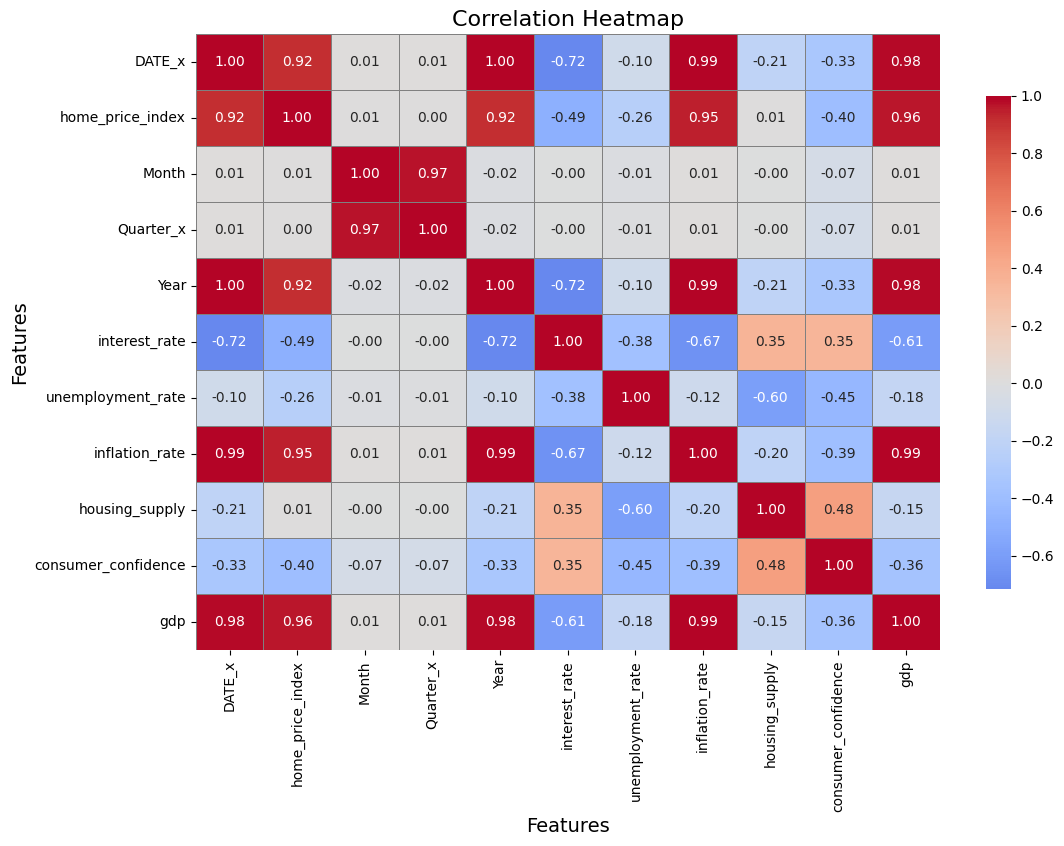

In [ ]:
# Compute the correlation matrix
corr = final_merged_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size of the figure
sns.heatmap(
    corr,
    annot=True,                  # Show the correlation values
    fmt=".2f",                   # Format the annotations to 2 decimal places
    cmap='coolwarm',             # Use a color palette that ranges from cool to warm colors
    center=0,                    # Center the color map at 0 for better visualization
    linewidths=0.5,              # Add lines between cells
    linecolor='gray',            # Color of the lines between cells
    cbar_kws={'shrink': .8}      # Adjust color bar size
)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)  # Title of the heatmap
plt.xlabel('Features', fontsize=14)            # X-axis label
plt.ylabel('Features', fontsize=14)            # Y-axis label

# Show the plot
plt.show()

3. Visualisations

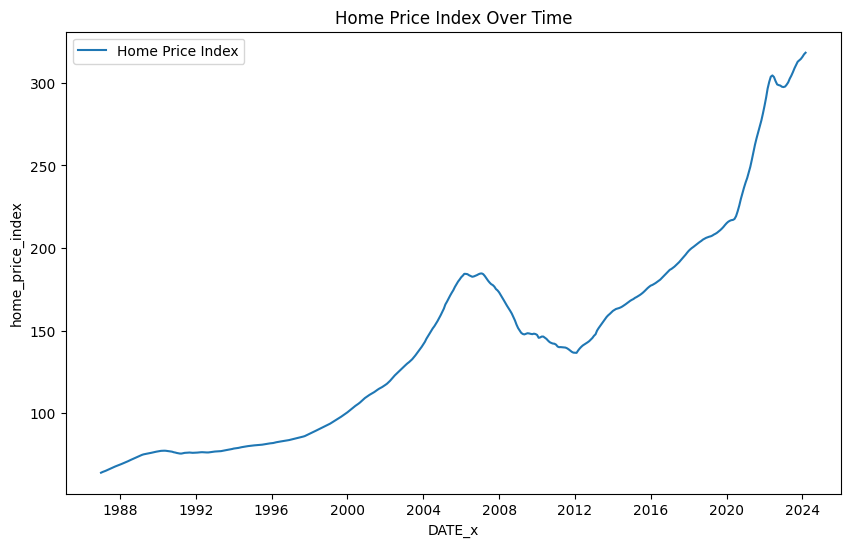

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_merged_df, x='DATE_x', y='home_price_index', label='Home Price Index') # Changed 'DATE_X' to 'DATE'
plt.title('Home Price Index Over Time')
plt.show()

# Model Building and Model Evaluation

1. Feature Selection

In [ ]:
X = final_merged_df[['interest_rate', 'unemployment_rate', 'inflation_rate', 'gdp', 'housing_supply', 'consumer_confidence']]
y = final_merged_df['home_price_index']

2. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Model Selection, Predictions & Evaluation Metrics

          Linear Regression


In [ ]:
# Import the statsmodels library
import statsmodels.api as sm

# Convert relevant columns in X_train and y_train to numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Add a constant (intercept) to the model
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print the OLS regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       home_price_index   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2713.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          5.39e-290
Time:                        23:57:24   Log-Likelihood:                -1278.6
No. Observations:                 357   AIC:                             2571.
Df Residuals:                     350   BIC:                             2598.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  19.7583    

In [ ]:
# Import the pandas library
import pandas as pd

# Import the statsmodels library
import statsmodels.api as sm

# Add a constant (intercept) to the model
X_test_with_const = sm.add_constant(X_test)

# Convert relevant columns in X_test_with_const to numeric types
X_test_with_const = X_test_with_const.apply(pd.to_numeric, errors='coerce')

# Predict using the test set
y_pred = ols_model.predict(X_test_with_const)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R^2 Score
r2 = r2_score(y_test, y_pred)

# Print results
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 8.40289598276785
R^2 Score: 0.9881538777474393


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that X_train and y_train are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Ensure that X_test and y_test are numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Drop rows with missing values in X_train, y_train, X_test, y_test
# This step is important to avoid issues with NaN values during model fitting and prediction
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Add a constant (intercept) to the model
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print the OLS regression results
print(ols_model.summary())

# Predict using the test set
y_pred = ols_model.predict(X_test_with_const)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R^2 Score
r2 = r2_score(y_test, y_pred)

# Print results
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')


                            OLS Regression Results                            
Dep. Variable:       home_price_index   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2713.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          5.39e-290
Time:                        23:57:25   Log-Likelihood:                -1278.6
No. Observations:                 357   AIC:                             2571.
Df Residuals:                     350   BIC:                             2598.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  19.7583    

          Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model2.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.9733497777777805
Root Mean Squared Error: 1.5785882348971
R-squared: 0.9995819233055868


          Lasso regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression RMSE: {rmse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}')

Lasso Regression RMSE: 8.324683538679793
Lasso Regression R^2 Score: 0.9883733740433903


        Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression RMSE: {rmse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}')

Ridge Regression RMSE: 8.40205642105931
Ridge Regression R^2 Score: 0.9881562448013245


# Analysis and Interpretation

1. Feature Importance

In [ ]:
from sklearn.linear_model import LinearRegression # import the LinearRegression model

lr_model = LinearRegression() # define the model
lr_model.fit(X_train, y_train) # fit the model to your data

importance_lr = lr_model.coef_ # now you can access the coef_ attribute
feature_importance_lr = pd.DataFrame({'feature': X.columns, 'importance': importance_lr})
feature_importance_lr = feature_importance_lr.sort_values(by='importance', ascending=False)
print("Linear Regression Feature Importance:")
print(feature_importance_lr)

Linear Regression Feature Importance:
               feature  importance
0        interest_rate    2.862844
1    unemployment_rate    0.903998
4       housing_supply    0.036928
3                  gdp    0.011375
2       inflation_rate   -0.099509
5  consumer_confidence   -0.850365


2. Trend Analysis

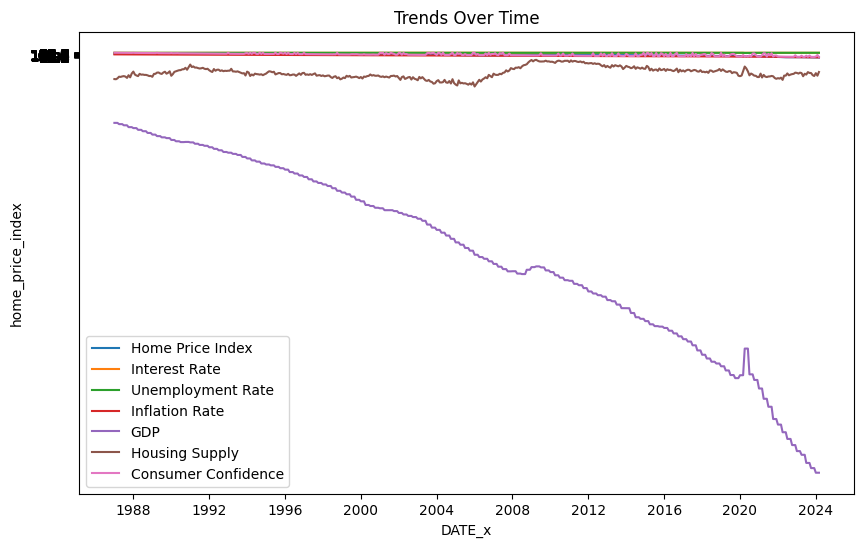

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_merged_df, x='DATE_x', y='home_price_index', label='Home Price Index')
sns.lineplot(data=final_merged_df, x='DATE_x', y='interest_rate', label='Interest Rate')
sns.lineplot(data=final_merged_df, x='DATE_x', y='unemployment_rate', label='Unemployment Rate')
sns.lineplot(data=final_merged_df, x='DATE_x', y='inflation_rate', label='Inflation Rate')
sns.lineplot(data=final_merged_df, x='DATE_x', y='gdp', label='GDP')
sns.lineplot(data=final_merged_df, x='DATE_x', y='housing_supply', label='Housing Supply')
sns.lineplot(data=final_merged_df, x='DATE_x', y='consumer_confidence', label='Consumer Confidence')
plt.legend()
plt.title('Trends Over Time')
plt.show()

#Comparing Metrics for some more models

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have X (features) and y (target variable)
modelGBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelGBR.fit(X, y)

# Make predictions
y_pred_gb = modelGBR.predict(X_test)

In [ ]:
print("Gradient Boosting Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("R-squared:", r2_score(y_test, y_pred_gb))
print()

Gradient Boosting Regression:
Mean Absolute Error: 0.4507285986604562
Root Mean Squared Error: 0.6855197111222986
R-squared: 0.9999211579099208



In [ ]:
from sklearn.svm import SVR

# Assuming you have X (features) and y (target variable)
modelSVR = SVR(kernel='rbf', C=1000, gamma=0.1)
modelSVR.fit(X, y)

# Make predictions
y_pred_svr = modelSVR.predict(X_test)

In [ ]:
# Support Vector Regression
print("Support Vector Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("R-squared:", r2_score(y_test, y_pred_svr))
print()

Support Vector Regression:
Mean Absolute Error: 0.10000989972082693
Root Mean Squared Error: 0.10001008368389963
R-squared: 0.9999983219464477

